<a href="https://colab.research.google.com/github/iaZe/Ideias-e-Aprendizados/blob/main/Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=b77d8519cc4bf3e37a13e78218d1160cdd437994b0af60812fc2ce31a6fa7b0b
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [105]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

df = pd.read_csv("/content/netflix.csv")

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [106]:
df.dropna(subset= ['duration'], inplace=True)
df.dropna(subset= ['director', 'cast'], inplace=True)

df['country'].fillna(df['country'].mode()[0], inplace=True)
df['rating'].fillna(df['rating'].mode()[0], inplace=True)

df.shape

(5697, 12)

In [107]:
content_type = df.groupby(['type']).size().reset_index(name='counts')

figure = px.pie(content_type, names = 'type', values = 'counts', color_discrete_sequence = px.colors.sequential.Agsunset,
             title = 'Tipos de conteúdo na Netflix', height =  500, width = 700)
figure.show()

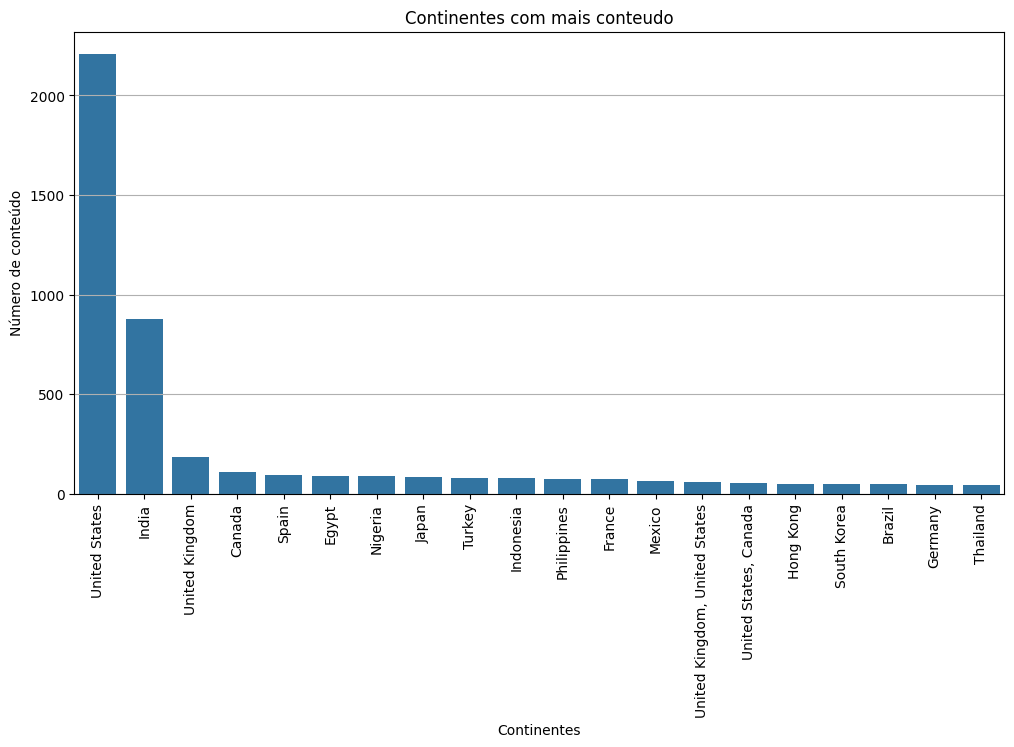

In [110]:
top_countries = df['country'].value_counts().head(20)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.title('Continentes com mais conteudo')
plt.xlabel('Continentes')
plt.ylabel('Número de conteúdo')
plt.grid(True, axis='y')
plt.xticks(rotation=90)
plt.show()

In [111]:
fig = px.bar(x=df["release_year"].value_counts().index,
             y=df["release_year"].value_counts().values,
             color=df["release_year"].value_counts().index)

fig.update_layout(
    title={
        'text': "Ano de lançamento",
        'font': {'color': 'black'}
    },
    xaxis_title={
        'text': "Ano de lançamento",
        'font': {'color': 'black'}
    },
    yaxis_title={
        'text': "Quantidade",
        'font': {'color': 'black'}
    },

)

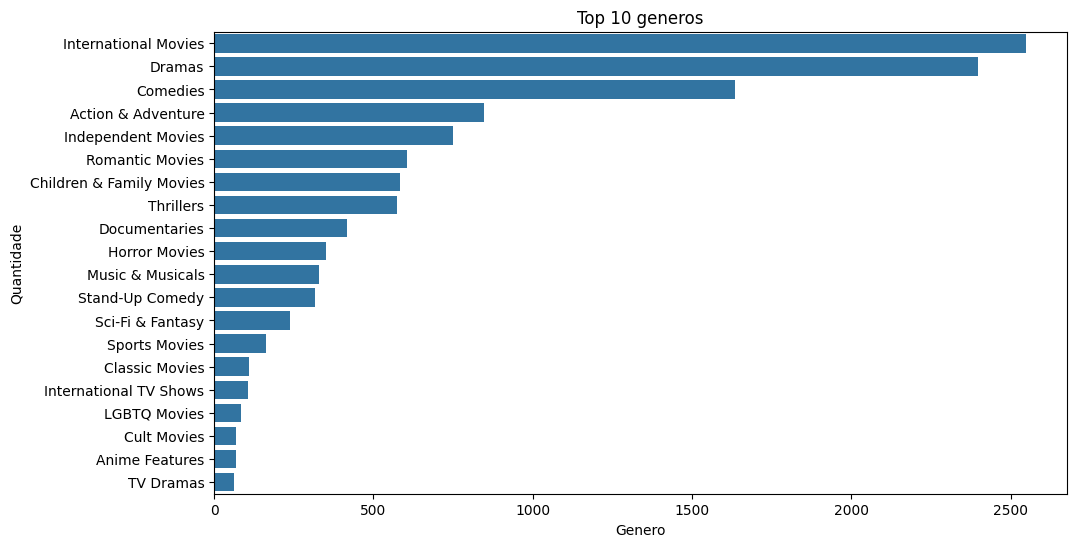

In [112]:
figure = df['listed_in'] = df['listed_in'].str.split(', ')
plt.figure(figsize=(11, 6))
genres = df['listed_in'].explode().value_counts().head(20)
sns.barplot(x=genres.values, y=genres.index)
plt.title('Top 10 generos')
plt.xlabel('Genero')
plt.ylabel('Quantidade')
plt.show()

<ipython-input-113-3278cf9855d2>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-113-3278cf9855d2>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



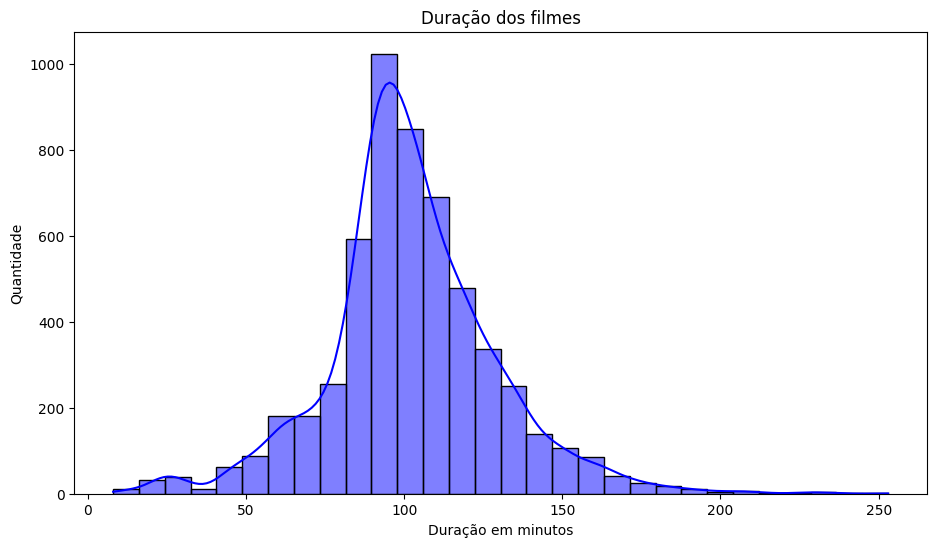

In [113]:
movie_df = df[df['type'] == 'Movie']
movie_df['duration'] = movie_df['duration'].str.replace(' min', '')
movie_df['duration'] = movie_df['duration'].astype(int)

plt.figure(figsize=(11, 6))
sns.histplot(movie_df['duration'], bins=30, kde=True, color='blue')
plt.title('Duração dos filmes')
plt.xlabel('Duração em minutos')
plt.ylabel('Quantidade')
plt.show()

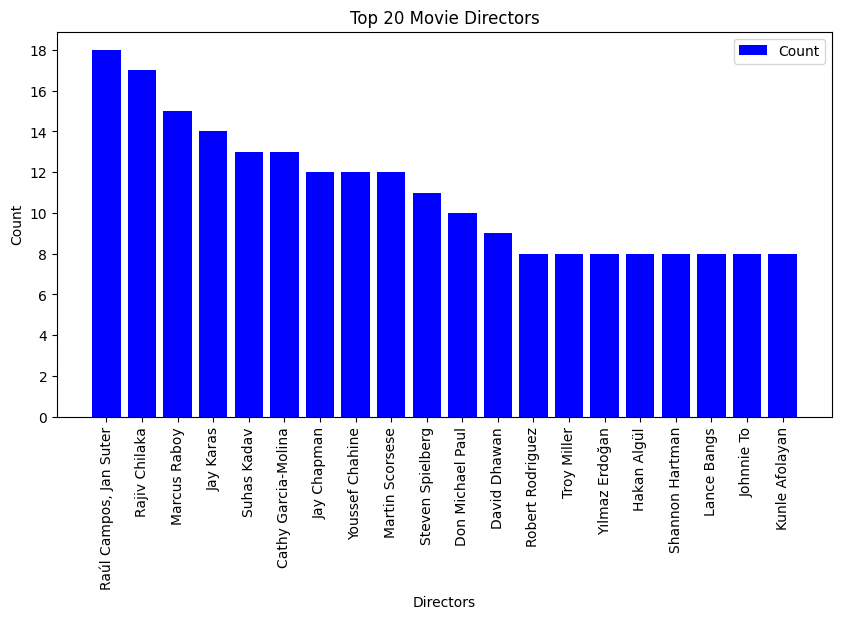

In [114]:
top_10_directors_movie = df['director'][df['type'] == 'Movie'].value_counts().sort_values(ascending=False).iloc[0:20].reset_index()
top_10_directors_movie
plt.figure(figsize=(10,5))
plt.bar(top_10_directors_movie['director'],top_10_directors_movie['count'], color = "blue" , label='Count')
plt.title('Os 20 diretores com mais filmes')
plt.xlabel('Diretores')
plt.ylabel('Filmes')
plt.xticks(rotation=90)
plt.yticks(np.arange(0,20,2))
plt.legend()
plt.show()